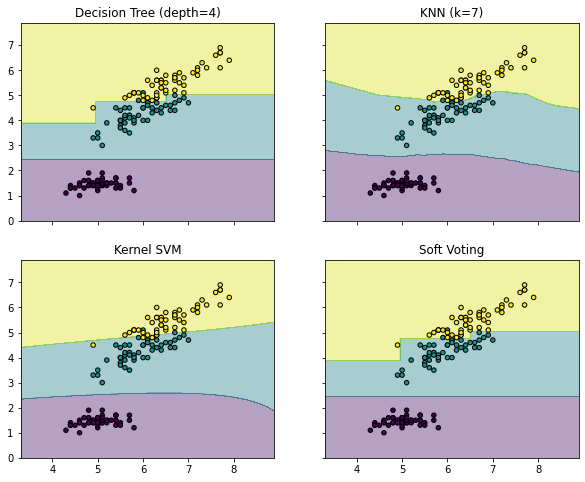

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X = iris.data[:,[0,2]] #取两列，方便绘图
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt',clf1),('knn',clf2),('svc',clf3)], voting='soft', weights=[2,1,1])
#weights控制每个算法的权重, voting=’soft' 使用了软权重


clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  #创建网格

fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8)) #共享X轴和Y轴

for idx, clf, title in zip(product([0, 1],[0, 1]),
                           [clf1, clf2, clf3, eclf],
                           ['Decision Tree (depth=4)', 'KNN (k=7)',
                            'Kernel SVM', 'Soft Voting']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #起初我以为是预测的X的值，实际上是预测了上面创建的网格的值，以这些值来进行描绘区域
    Z = Z.reshape(xx.shape)
    axes[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axes[idx[0], idx[1]].scatter(X[:, 0],X[:, 1], c=y, s=20, edgecolor='k')
    axes[idx[0], idx[1]].set_title(title)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import warnings
import json

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from xgboost import plot_importance

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

df = pd.read_csv("NewData.csv")
data =df.values

scaler = MinMaxScaler()
#scaler = StandardScaler()
result_feature = scaler.fit_transform(data[:,:18])
result_label = data[:,18]
result = np.append(result_feature, result_label.reshape(len(result_label),1), axis = 1)
df_newdata = pd.DataFrame(result, columns= df.columns)


Y = df["Outcome"].values
X = df[['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']].values
names = ['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension',
       'SBP', 'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr',
       'TG', 'TC']


score = 'f1'

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

clfrf = RandomForestClassifier(n_estimators=35, max_depth= 5, max_features= 4)
#clfSVC =  SVC(C= 20, kernel = 'linear', probability= True)
clfSVC = SVC(C= 1, gamma=1, kernel = 'linear', probability= True)
clfGBDT = GradientBoostingClassifier(n_estimators=45, max_depth= 4, max_features= 3)
#clfXGBT = XGBClassifier(n_estimators=35, max_depth= 5, learning_rate= 0.01)
clfXGBT = XGBClassifier(n_estimators=70, max_depth= 6, min_child_weight=1, learning_rate= 0.01)

df_weights = pd.read_csv("Weight.csv")

print(df_weights[df_weights.columns[0]])
df_weights = df_weights.drop([df_weights.columns[0],df_weights.columns[-1]], axis= 1)



0      RF
1     SVM
2    GBDT
3     XGB
Name: blank, dtype: object


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

clfrf = RandomForestClassifier(n_estimators=20, 
                            max_depth= 19, 
                            max_features= 6, 
                            min_samples_leaf=1, 
                            min_samples_split=5, 
                            bootstrap=False)

clfSVC =  SVC(C= 10, kernel = 'rbf', gamma=0.01, probability=True)

clfGBDT = GradientBoostingClassifier(n_estimators=25, 
                                max_depth= 19,
                                 max_features= 9, 
                                 min_samples_leaf=1, 
                                 min_samples_split=5)

clfXGBT = XGBClassifier(n_estimators=60, max_depth= 8, learning_rate= 0.1)

df_weights = pd.read_csv("Weight.csv")

print(df_weights[df_weights.columns[0]])
df_weights = df_weights.drop([df_weights.columns[0],df_weights.columns[-1]], axis= 1)



0      RF
1     SVM
2    GBDT
3     XGB
Name: blank, dtype: object


In [4]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 8)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)

    

0it [00:00, ?it/s]

[3. 3. 3. 1.]


1it [00:04,  4.59s/it]

[0.88405797 0.89855072 0.85507246 0.8115942  0.94202899 0.76811594
 0.86956522 0.85507246 0.85507246 0.88405797]
0.8623188405797102
[3. 3. 2. 2.]


2it [00:08,  4.03s/it]

[0.85507246 0.91304348 0.92753623 0.79710145 0.86956522 0.91304348
 0.91304348 0.88405797 0.88405797 0.86956522]
0.8826086956521738
[3. 2. 3. 2.]


3it [00:11,  3.81s/it]

[0.88405797 0.79710145 0.88405797 0.88405797 0.89855072 0.89855072
 0.89855072 0.8115942  0.86956522 0.91304348]
0.8739130434782609
[3. 1. 3. 3.]


4it [00:15,  3.88s/it]

[0.85507246 0.86956522 0.86956522 0.79710145 0.92753623 0.94202899
 0.7826087  0.88405797 0.88405797 0.85507246]
0.8666666666666666
[4. 4. 1. 1.]


5it [00:19,  3.76s/it]

[0.91304348 0.92753623 0.85507246 0.85507246 0.86956522 0.94202899
 0.89855072 0.89855072 0.79710145 0.91304348]
0.8869565217391304
[4. 3. 2. 1.]


6it [00:23,  3.92s/it]

[0.86956522 0.91304348 0.89855072 0.89855072 0.92753623 0.85507246
 0.84057971 0.94202899 0.76811594 0.91304348]
0.8826086956521738
[4. 2. 3. 1.]


7it [00:27,  4.05s/it]

[0.8115942  0.86956522 0.86956522 0.82608696 0.88405797 0.84057971
 0.89855072 0.85507246 0.91304348 0.89855072]
0.8666666666666666
[4. 2. 2. 2.]


8it [00:31,  4.01s/it]

[0.88405797 0.91304348 0.91304348 0.86956522 0.85507246 0.94202899
 0.88405797 0.85507246 0.89855072 0.89855072]
0.8913043478260871
[4. 1. 4. 1.]


9it [00:35,  3.90s/it]

[0.89855072 0.88405797 0.86956522 0.88405797 0.91304348 0.79710145
 0.89855072 0.8115942  0.76811594 0.92753623]
0.8652173913043477
[4. 1. 3. 2.]


10it [00:39,  3.85s/it]

[0.89855072 0.89855072 0.85507246 0.8115942  0.91304348 0.8115942
 0.89855072 0.85507246 0.86956522 0.88405797]
0.8695652173913044
[5. 3. 1. 1.]


11it [00:42,  3.78s/it]

[0.88405797 0.84057971 0.92753623 0.94202899 0.89855072 0.92753623
 0.89855072 0.84057971 0.89855072 0.89855072]
0.8956521739130435
[5. 2. 2. 1.]


12it [00:46,  3.78s/it]

[0.92753623 0.86956522 0.84057971 0.88405797 0.84057971 0.92753623
 0.7826087  0.8115942  0.82608696 0.88405797]
0.8594202898550725
[5. 1. 3. 1.]


13it [00:50,  3.82s/it]

[0.85507246 0.84057971 0.7826087  0.88405797 0.8115942  0.85507246
 0.91304348 0.82608696 0.88405797 0.89855072]
0.855072463768116
[5. 1. 2. 2.]


14it [00:54,  3.80s/it]

[0.86956522 0.91304348 0.94202899 0.91304348 0.8115942  0.92753623
 0.91304348 0.8115942  0.79710145 0.86956522]
0.8768115942028984
[6. 2. 1. 1.]


15it [00:57,  3.75s/it]

[0.89855072 0.88405797 0.84057971 0.85507246 0.89855072 0.86956522
 0.91304348 0.86956522 0.85507246 0.91304348]
0.8797101449275363
[6. 1. 2. 1.]


16it [01:01,  3.82s/it]

[0.86956522 0.88405797 0.88405797 0.89855072 0.88405797 0.86956522
 0.91304348 0.84057971 0.95652174 0.92753623]
0.8927536231884059
[7. 1. 1. 1.]


17it [01:05,  3.81s/it]

[0.86956522 0.88405797 0.92753623 0.86956522 0.84057971 0.84057971
 0.84057971 0.88405797 0.85507246 0.88405797]
0.8695652173913044
[2. 2. 2. 4.]


18it [01:09,  3.77s/it]

[0.8115942  0.85507246 0.92753623 0.85507246 0.88405797 0.86956522
 0.92753623 0.85507246 0.88405797 0.85507246]
0.8724637681159422
[1. 1. 1. 7.]


19it [01:13,  3.76s/it]

[0.82608696 0.85507246 0.88405797 0.95652174 0.88405797 0.84057971
 0.84057971 0.85507246 0.89855072 0.92753623]
0.8768115942028987
[1. 2. 1. 6.]


20it [01:16,  3.84s/it]

[0.85507246 0.85507246 0.89855072 0.88405797 0.76811594 0.82608696
 0.88405797 0.8115942  0.88405797 0.7826087 ]
0.8449275362318842
0.8956521739130435 [5. 3. 1. 1.]


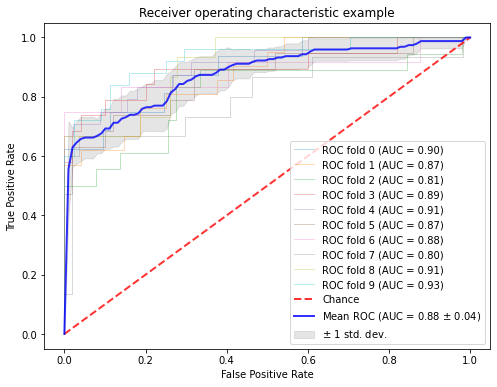

In [5]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='soft', weights= [3, 3, 2, 2])
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict_proba(X[test])
    # y_score.shape==(75, 3)
    #if len(y_score.shape)<= 1 :
    #    y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [6]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, ShuffleSplit

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
max_score = 0
max_weights = []
for index, col in tqdm(df_weights.iteritems()):
    #print(col)
    clf_weights = col.values[:4]*10
    print(clf_weights)
    vclf = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= clf_weights)
    score = cross_val_score(vclf, X, Y, cv=ShuffleSplit(10, test_size = .1, train_size = .9), n_jobs = 6)
    print(score)
    print(sum(score)/len(score))

    if max_score<(sum(score)/len(score)):
        max_weights = clf_weights
        max_score = sum(score)/len(score)

print(max_score, max_weights)

    

0it [00:00, ?it/s]

[3. 3. 3. 1.]


1it [00:05,  5.97s/it]

[0.85507246 0.92753623 0.84057971 0.92753623 0.85507246 0.92753623
 0.91304348 0.85507246 0.79710145 0.92753623]
0.8826086956521738
[3. 3. 2. 2.]


2it [00:11,  5.75s/it]

[0.85507246 0.88405797 0.89855072 0.85507246 0.89855072 0.89855072
 0.8115942  0.85507246 0.97101449 0.84057971]
0.8768115942028987
[3. 2. 3. 2.]


3it [00:17,  5.62s/it]

[0.85507246 0.88405797 0.75362319 0.85507246 0.82608696 0.89855072
 0.88405797 0.92753623 0.97101449 0.92753623]
0.8782608695652175
[3. 1. 3. 3.]


4it [00:22,  5.38s/it]

[0.86956522 0.82608696 0.84057971 0.92753623 0.91304348 0.86956522
 0.86956522 0.86956522 0.79710145 0.86956522]
0.8652173913043478
[4. 4. 1. 1.]


5it [00:26,  5.20s/it]

[0.88405797 0.88405797 0.82608696 0.94202899 0.76811594 0.86956522
 0.89855072 0.85507246 0.85507246 0.84057971]
0.8623188405797102
[4. 3. 2. 1.]


6it [00:31,  5.14s/it]

[0.88405797 0.91304348 0.86956522 0.84057971 0.84057971 0.86956522
 0.91304348 0.82608696 0.92753623 0.91304348]
0.8797101449275362
[4. 2. 3. 1.]


7it [00:37,  5.11s/it]

[0.89855072 0.88405797 0.91304348 0.76811594 0.88405797 0.89855072
 0.92753623 0.88405797 0.8115942  0.85507246]
0.872463768115942
[4. 2. 2. 2.]


8it [00:42,  5.13s/it]

[0.94202899 0.95652174 0.94202899 0.86956522 0.85507246 0.91304348
 0.91304348 0.91304348 0.85507246 0.89855072]
0.9057971014492752
[4. 1. 4. 1.]


9it [00:46,  4.94s/it]

[0.85507246 0.86956522 0.82608696 0.92753623 0.84057971 0.86956522
 0.82608696 0.92753623 0.89855072 0.88405797]
0.872463768115942
[4. 1. 3. 2.]


10it [00:51,  4.89s/it]

[0.82608696 0.92753623 0.82608696 0.88405797 0.91304348 0.89855072
 0.88405797 0.94202899 0.89855072 0.8115942 ]
0.881159420289855
[5. 3. 1. 1.]


11it [00:56,  4.87s/it]

[0.89855072 0.92753623 0.89855072 0.88405797 0.84057971 0.86956522
 0.94202899 0.88405797 0.86956522 0.86956522]
0.8884057971014494
[5. 2. 2. 1.]


12it [01:01,  4.99s/it]

[0.88405797 0.91304348 0.91304348 0.82608696 0.85507246 0.85507246
 0.88405797 0.88405797 0.88405797 0.84057971]
0.8739130434782609
[5. 1. 3. 1.]


13it [01:06,  4.95s/it]

[0.8115942  0.89855072 0.85507246 0.86956522 0.8115942  0.88405797
 0.91304348 0.84057971 0.84057971 0.86956522]
0.8594202898550725
[5. 1. 2. 2.]


14it [01:11,  4.89s/it]

[0.86956522 0.8115942  0.89855072 0.86956522 0.84057971 0.7826087
 0.86956522 0.89855072 0.89855072 0.88405797]
0.8623188405797102
[6. 2. 1. 1.]


15it [01:16,  5.14s/it]

[0.84057971 0.82608696 0.86956522 0.85507246 0.85507246 0.86956522
 0.76811594 0.88405797 0.85507246 0.86956522]
0.8492753623188406
[6. 1. 2. 1.]


16it [01:21,  5.07s/it]

[0.84057971 0.92753623 0.89855072 0.84057971 0.94202899 0.8115942
 0.85507246 0.85507246 0.85507246 0.82608696]
0.8652173913043478
[7. 1. 1. 1.]


17it [01:27,  5.19s/it]

[0.84057971 0.86956522 0.84057971 0.94202899 0.86956522 0.85507246
 0.88405797 0.91304348 0.86956522 0.88405797]
0.8768115942028987
[2. 2. 2. 4.]


18it [01:32,  5.17s/it]

[0.84057971 0.89855072 0.86956522 0.94202899 0.85507246 0.84057971
 0.8115942  0.85507246 0.85507246 0.91304348]
0.8681159420289856
[1. 1. 1. 7.]


19it [01:37,  5.04s/it]

[0.86956522 0.86956522 0.84057971 0.91304348 0.86956522 0.82608696
 0.88405797 0.94202899 0.84057971 0.88405797]
0.8739130434782609
[1. 2. 1. 6.]


20it [01:42,  5.13s/it]

[0.88405797 0.86956522 0.91304348 0.85507246 0.85507246 0.89855072
 0.7826087  0.86956522 0.86956522 0.89855072]
0.8695652173913044
0.9057971014492752 [4. 2. 2. 2.]


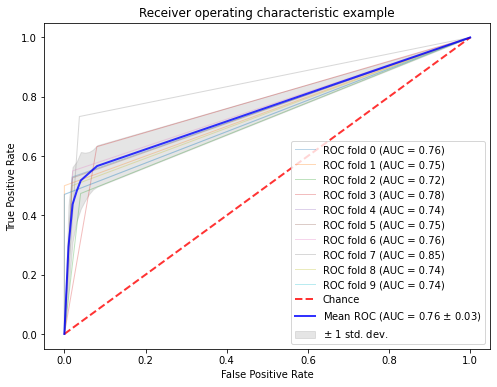

In [7]:
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#if len(Y)
n_classes = Y.shape
cv = ShuffleSplit(10, test_size = .1, train_size = .9)
classifier = VotingClassifier(estimators=[('rf',clfrf),('svc',clfSVC),('gbdt',clfGBDT),('xgbt',clfXGBT)], voting='hard', weights= [4, 4, 1, 1])
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))
i = 0
for train, test in cv.split(X, Y):
    y_score = classifier.fit(X[train], Y[train]).predict(X[test])
    # y_score.shape==(75, 3)
    if len(y_score.shape)<= 1 :
        y_score = y_score[:, np.newaxis]
    # 为每个类别计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(Y[test], y_score[:, 0])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [8]:
y_score[:,0]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [9]:
Y[test]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])